<font size="5">**Imports**</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

<font size="5">**Dataset preparation**</font>

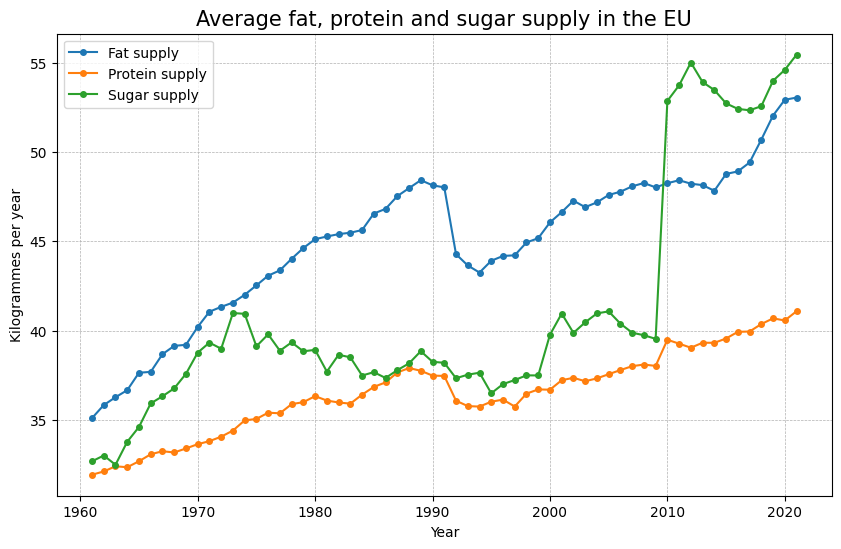

In [59]:
def plot_food_supply(dataset: str,
                     plot_title: str,
                     x_label: str,
                     y_label: str) -> None:
    """
    Generates a line plot describing the average fat, protein and sugar 
    supply in countries of the European Union. 
    The plot shows the relevant data covering the entire time interval
    of the specified dataset.

    Required parameters:
    --------------------
            dataset (str): The filepath of the used dataset.
            plot_title (str): The title of the plot.
            x_label (str): The name of the y-label of the plot.
            y_label (str): The name of the y-label of the plot.

    Returns:
    --------
            None: The generated bar plot.
    """
    
    #Dataset prepocessing
    food_supply = pd.read_csv(dataset)
    food_supply = food_supply.drop(['Observation value'], axis = 1)
    food_supply = food_supply.rename(columns={"TIME_PERIOD": "Year", 
                                              "OBS_VALUE": "Observation value"})
    
    #Filter out required data for the plot
    supply_filter = ['Fat supply', 'Protein supply', 'Sugar supply']
    yearly_supply = food_supply.loc[(food_supply['Measure'].isin(supply_filter))]

    #Filter out countries of the European Union
    EU = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
          'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 
          'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 
          'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
    yearly_supply = yearly_supply.loc[(yearly_supply['Reference area'].isin(EU))]
        
    #Unit of fat and protein supply is grammes per day, approximate the value in kilogrammes per year 
    yearly_supply.loc[yearly_supply['Measure'] == 'Fat supply', 
                      'Observation value'] = yearly_supply.loc[yearly_supply['Measure'] == 
                      'Fat supply',  'Observation value'] * 0.365
    yearly_supply.loc[yearly_supply['Measure'] == 'Protein supply', 
                      'Observation value'] = yearly_supply.loc[yearly_supply['Measure'] == 
                      'Protein supply',  'Observation value'] * 0.365
        
    #Calculate the mean supply values for each year using data of all countries
    yearly_supply_plot = yearly_supply.groupby(['Year',
                                                'Measure'])['Observation value'].mean().unstack()
        
    #Generate the line plot
    yearly_supply_plot.plot(kind='line', 
                            marker = 'o', 
                            markersize = 4, 
                            figsize = (10,6))
    plt.title(plot_title, 
               fontsize = 15)
    plt.ylabel(y_label, 
               fontsize = 10)
    plt.xlabel(x_label, 
               fontsize = 10)
    plt.grid(linestyle = '--', 
             linewidth = '0.5')
    plt.legend(title = None)
    plt.show()

plot_food_supply(r"C:\Users\Dana\OneDrive\Desktop\assignment2\Food_supply_and_consumption.csv",
                'Average fat, protein and sugar supply in the EU',
                'Year',
                'Kilogrammes per year') 